# Lab 08: Deep Learning Part I: Fully Connected Neural Networks

In class, we have developed the mathematics and programming techniques for binary classification using fully connected neural networks
having one or more hidden layers.

Today, we'll expand on that to consider (small) image classification using again fully connected neural networks with a multinomial
(softmax) output layer.

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## What is Deep learning doing?

Let's try to classify the deep learning in this <link>[link](https://playground.tensorflow.org/
)</link>. The page can observe your network visualization when learning it.

![Lab08-1.PNG](attachment:Lab08-1.PNG)

Select The initial setup of data (at the left) as:
- Ratio of training to test data: 90%
- Noise: 5
- Batch size: 4

Press run and observe the result.

## Exercise 1 (10 points)

Select the spiral shape (the 4th shape). Select The initial setup of data (at the left) as:
- Ratio of training to test data: 90%
- Noise: 35
- Batch size: 4

Try to make the best separating result. Capture your **FULL** screen and input below

Capture scrren here!

![image](deep_learning.png)



**Expect result**:

![Lab08-2.PNG](attachment:Lab08-2.PNG)

#### Special coding

You can make jupyter in GUI (it also can export to HTML website).

In [1]:
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

# defining some widgets
lblQ1 = widgets.Label(
        value="Q1) What is your learning rate?")
rdoQ1 = widgets.RadioButtons(
        options=['0.00001', '0.0001', '0.001', '0.003', '0.01', '0.03', '0.1', '0.3', '1', '3', '10',],
        value='0.03',
        description='\t',
        disabled=False)

lblQ2 = widgets.Label(
        value="Q2) What is your activation function in last layer?")
rdoQ2 = widgets.RadioButtons(
        options=['ReLu', 'Tanh', 'Sigmoid', 'Linear',],
        value='Tanh',
        description='\t',
        disabled=False)

lblQ3 = widgets.Label(
        value="Q3) What is problem type?")
rdoQ3 = widgets.RadioButtons(
        options=['Classification', 'Regression'],
        value='Classification',
        description='\t',
        disabled=False)

lblQ4 = widgets.Label(value="Q4) Which input do you use?")
chkQ4_1 = widgets.Checkbox(
           description='$X_1$',
           value=True)
chkQ4_2 = widgets.Checkbox(
           description='$X_2$',
           value=True)
chkQ4_3 = widgets.Checkbox(
           description='$X_1^2$',)
chkQ4_4 = widgets.Checkbox(
           description='$X_1X_2$',)
chkQ4_5 = widgets.Checkbox(
           description='$X_2^2$',)
chkQ4_6 = widgets.Checkbox(
           description='sin$(X_1)$',)
chkQ4_7 = widgets.Checkbox(
           description='sin$(X_2)$',)
chkQ4 = widgets.VBox([chkQ4_1, chkQ4_2, chkQ4_3, chkQ4_4, chkQ4_5, chkQ4_6, chkQ4_7])

lblQ5 = widgets.Label(value="Q5) How many hidden layers do you use?")
txtQ5 = widgets.IntText(
       value=0,
       description='hidden layers', )

lblQ6 = widgets.Label(value="Q6) Explain your nodes for each layer")
txtQ6 = widgets.Textarea(
       value='',
       description='Explain here', )

box = widgets.VBox([lblQ1, rdoQ1, lblQ2, rdoQ2, lblQ3, rdoQ3, lblQ4, chkQ4, lblQ5, txtQ5, lblQ6, txtQ6,])

box

In [2]:
q4str = ""
if chkQ4_1.value:
    q4str += " X1,"
if chkQ4_2.value:
    q4str += " X2,"
if chkQ4_3.value:
    q4str += " X1^2,"
if chkQ4_4.value:
    q4str += " X1X2,"
if chkQ4_5.value:
    q4str += " X2^2,"
if chkQ4_6.value:
    q4str += " sin(X1),"
if chkQ4_7.value:
    q4str += " sin(X2),"
print("Use input features:", q4str)
print("Problem type:", rdoQ3.value)
print("The last activation function:", rdoQ2.value)
print("Learning rate:", rdoQ1.value)
print("Use", txtQ5.value, "hidden layers. Each layer contains", txtQ6.value)

Use input features:  X1, X2, X1^2, X1X2, X2^2,
Problem type: Classification
The last activation function: Sigmoid
Learning rate: 0.01
Use 2 hidden layers. Each layer contains a set of neurons. The 1st hidden layer has 4 neurons and the 2nd hidden layer has 2 neurons.


## MNIST Data

An image is a 2D array of pixels. Pixels can be scalar intensities (for a grayscale / black and white image) or a vector indicating a
point in a color space such as RGB or HSV.

Today we'll consider 8x8 grayscale images of digits from the famous "MNIST" dataset, which was considered a benchmark for machine learning algorithms
up to the early 2000s, before the advent of large-scale image classification datasets.

This dataset in SciKit-Learn has 10 classes, with 180 samples per class in most cases, for a total of 1797 samples.

Let's load the dataset and check the y output.

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load data

data = load_digits()

y_indices = data.target
print(y_indices[100])

4


## One hot encoding

As you can see, the y output is index value. To use the value for classify in deep learning, you need to convert it to one hot. 

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In this time, you need to convert the index value to be

$$0 \rightarrow [1, 0,0,0,0,0,0,0,0,0]$$
$$1  \rightarrow  [0, 1,0,0,0,0,0,0,0,0]$$
$$2  \rightarrow  [0, 0,1,0,0,0,0,0,0,0]$$
$$3  \rightarrow  [0, 0,0,1,0,0,0,0,0,0]$$
$$4  \rightarrow  [0, 0,0,0,1,0,0,0,0,0]$$
$$5  \rightarrow  [0, 0,0,0,0,1,0,0,0,0]$$
$$6  \rightarrow  [0, 0,0,0,0,0,1,0,0,0]$$
$$7  \rightarrow  [0, 0,0,0,0,0,0,1,0,0]$$
$$8  \rightarrow  [0, 0,0,0,0,0,0,0,1,0]$$
$$9  \rightarrow  [0, 0,0,0,0,0,0,0,0,1]$$

In [ ]:
def convert_to_one_hot(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, int(y[i])] = 1
    return y_vect

# Convert target indices to one-hot representation
y = convert_to_one_hot(y_indices)
print(y[100])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Let's see the X input shape.

In [ ]:
X = np.matrix(data.data)
print(X.shape)

(1797, 64)


You can see that the row number is the index of mnist data, and the column number is the mnist data of 64 pixels which is ready for using it as the fully connect network. To show the image, you need to reshape the 64 pixels to be $8\times8$.

Text(0.5, 1.0, 'Example MNIST sample (category 0)')

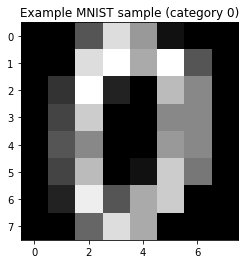

In [ ]:
data_size = X.shape[0]
x_area = X.shape[1]

# Plot an example
plt.imshow(np.reshape(X[0,:],(8,8)), 'gray')
plt.title('Example MNIST sample (category %d)' % y_indices[0])

##  Reshaping arrays

Actually, normally when you load an image to use in your fully-connect neural network, you need to reshape the image arrays into vector of shape $(length\times height \times depth, 1)$ as example below.

<img src="image2vector_kiank.png" title="image2vector_kiank" style="width: 600px;" />

Two common numpy functions used in reshape are np.shape and np.reshape().

- <code>X.shape</code> is used to get the shape (dimension) of a matrix/vector $X$.
- <code>X.reshape(...)</code> is used to reshape $X$ into some other dimension.

In [ ]:
def image2vector(image):
    """
    Convert image with 3 dimensions to become vector of (size, 1)
    """
    v = image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
    # v = image.reshape(-1,1)       # another one solution
    return v

image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


## Hand-Coded Fully Connected Neural Network

Let's modify our code from class to work with this dataset and run 100 epochs of training.
The main change is to use a one-hot encoding of the 10 classes at the output layer and to use
the softmax activation function at the output. Some minor changes are required to calculate multinomial
cross entropy loss rather than binary cross entropy loss.

<img src="nn_mnist.jpeg" title="mnist neural network" style="width: 600px;" />

*Note*: change SoftMin to be SoftMax

In [ ]:
import random
import warnings
warnings.filterwarnings("ignore")

#### Normalize each input feature

Change the input X to be normalize vector. The normalize equation is

$$norm(X) = \frac{X-\bar{X}}{SD}$$

In [ ]:
def normalize(X):
    M = X.shape[0]
    XX = X - np.tile(np.mean(X,0),[M,1])
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return np.nan_to_num(XX, copy=True,nan=0.0)

XX = normalize(X)

#### Partion data into training and testing dataset

In deep learning, it is necessary for split your raw data to be 3 types:
1. Training set - Data for training and learn
2. Validate set - Data for test the network in each epoch or loop training.
3. Test set - Data for test the network in finalize after training. This can assume that if the network is going to use, what accuracy should be.

Spliting the training, validate, and test set need to make sure that
1. The data need to be random.
2. The validate and test set must be in the same as training set environment, but do not the same data from training set.
3. A lot of data of training set can make your model accurate, but need to make sure that the validate and test set cover your conditions.

Normally, we should split data in percentage. However, this is not fixed. You can adjust.
- 60% training, 20% validate, and 20% test for the data over 1 million set
- 80% training, 10% validate, and 10% test for otherwise.
- For the very low data (~1000 data), we could use validate and test set in the same data.

However, there are some trick about spliting the data when the data is too low, but we do not talk about it in here.

In [ ]:
percent_train = .6

idx = np.arange(0,data_size)

random.shuffle(idx)
m_train = int(data_size * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:data_size+1]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];
y_test_indices = y_indices[test_idx]

#### Create some important activation functions

ReLu equation is written

$$ReLu(x) = \max(0,x)$$

Tanh equation is written

$$Tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$

Sigmoid equation is written

$$Sigmoid(x) = \frac{1}{1+e^{-x}}$$

And Softmax equation is written

$$Softmax(x) = softmax([x_1,x_2,\cdots,x_n])=
\begin{bmatrix}
\frac{e^{x_1}}{\sum_j e^{x_j}} & \frac{e^{x_2}}{\sum_j e^{x_j}} & \cdots & \frac{e^{x_n}}{\sum_j e^{x_j}}
\end{bmatrix}$$

In [ ]:
def ReLu(x):
    output = np.maximum(0,x)
    return output

def Tanh(x):
    x_p = np.exp(x)
    x_m = np.exp(-x)
    output = (x_p - x_m) / (x_p + x_m)
    return output

def Sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

def Softmax(x):
    exp_x = np.exp(x)
    output = exp_x/np.sum(exp_x)
    return output

#### Create network

Let's start with a 3-layer network with sigmoid activation functions, \
6 units in layer 1, and 5 units in layer 2.

In [ ]:
h2 = 5
h1 = 6
W = [[], np.random.normal(0,0.1,[x_area,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
B = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]

act_funcs = [None, ReLu, Sigmoid, Softmax]

L = len(W)-1

#### Create Forward activation function

For input $x^{(i)}$, the forward propagation in each layer can be calculated by
$$z^{(i)}=W^Tx^{(i)}+b$$
$$\hat{y}^{(i)}=a^{(i)}=act(z^{(i)})$$

In [ ]:
def forward_layer(w, b, X, act_func):
    z = w.T * X + b
    if act_func is not None:
        y_hat = act_func(z)
    else:
        y_hat = z
    return z, y_hat

In [ ]:
# test function
X = np.array([[.9, 0.2, 0.1, -0.3, -0.7]]).T

w = np.array([[0.2, 0.1, 1, 3, 0.5]])
b = np.array([[1]])

z2, y_hat1 = forward_layer(w, 0.5, X, None)
z1, y_hat2 = forward_layer(w, b, X, Sigmoid)
z2, y_hat3 = forward_layer(w, 0.5, X, ReLu)
print('Linear output of y_hat1', y_hat1, ', y_hat2', y_hat2, 'and y_hat3', y_hat2)

Linear output of y_hat1 [[ 0.68]
 [ 0.52]
 [ 0.6 ]
 [-0.4 ]
 [ 0.15]] , y_hat2 [[0.7649478 ]
 [0.7349726 ]
 [0.75026011]
 [0.52497919]
 [0.65701046]] and y_hat3 [[0.7649478 ]
 [0.7349726 ]
 [0.75026011]
 [0.52497919]
 [0.65701046]]


#### Forward propagation

In [ ]:
def forward_one_step(X, W, B, act_funcs):
    L = len(W)-1
    a = [X]
    z = [[]]
    delta = [[]]
    dW = [[]]
    db = [[]]
    for l in range(1,L+1):
        z_layer, a_layer = None, None
        ### BEGIN SOLUTION
        z_layer, a_layer = forward_layer(W[l], B[l], a[l-1], act_funcs[l])
        ### END SOLUTION
        z.append(z_layer)
        a.append(a_layer)
        # Just to give arrays the right shape for the backprop step
        delta.append([]); dW.append([]); db.append([])
    return a, z, delta, dW, db

In [ ]:
def feed_forward(X,W,B, act_funcs):
    L = len(W)-1
    a = [X]
    z = [[]]
    delta = [[]]
    dW = [[]]
    db = [[]]
    for l in range(1,L+1):
        z_layer, a_layer = forward_layer(W[l], B[l], a[l-1], act_funcs[l])
        z.append(z_layer)
        a.append(a_layer)
    return a_layer

In [ ]:
# test function

x_this = X_train[0,:].T

a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
print('size of a', len(a), 'a[3] =', a[3])
print('size of z', len(z), 'z[3] =', z[3])

size of a 4 a[3] = [[0.10851504]
 [0.10902876]
 [0.10207102]
 [0.09717262]
 [0.12677286]
 [0.10717895]
 [0.09680085]
 [0.1095434 ]
 [0.07388781]
 [0.0690287 ]]
size of z 4 z[3] = [[ 0.08289005]
 [ 0.08761299]
 [ 0.02167013]
 [-0.02750973]
 [ 0.23839831]
 [ 0.07050113]
 [-0.03134293]
 [ 0.09232212]
 [-0.30145077]
 [-0.36947638]]


## Loss function

For softmax loss function, it is cross entropy loss. You can calculate as

$$\mathcal{L} = -\sum_{i=0}^n (y_i * \log\hat{y}_i)$$

In [ ]:
def loss(y, yhat):
    l = - np.dot(y, np.log(yhat))
    return l

### Back propagation

Back propagation can be calculated as

$$\frac{\partial\mathcal{L}}{\partial z^{[l-1]} } =[W^{[l]}]^T \cdot \frac{ \partial\mathcal{L} }{\partial z^{[l]} } * {g^{[l-1]}}'(z^{[l-1]})$$

$$\frac{\partial\mathcal{L}}{\partial W^{[l]} } = \frac{ \partial\mathcal{L} }{\partial z^{[l]} } \cdot [a^{[l-1]}]^T$$

$$\frac{\partial\mathcal{L}}{\partial b^{[l]} } = \frac{ \partial\mathcal{L} }{\partial z^{[l]} }$$

When ${g^{[l-1]}}'$ is derivative activation function.

### derivative activation functions

First step of back propagation function, we need to calculate derivative of the activation functions that we use.

The Linear_derivative ($dl$) function is
$$dl(x) = [1]$$

The ReLu_derivative ($dReLu$) function is

$$dReLu(x)=
\left\{\begin{matrix}
1 & x > 0\\ 
0 & otherwise
\end{matrix}\right.$$

The Tanh_derivative ($dTanh$) function is

$$d\tanh(x) = 1 - \tanh^2(x)$$

The Sigmoid_derivative ($ds$) function is

$$dSigmoid(x) = Sigmoid(x)(1-Sigmoid(x))$$


In [ ]:
def Linear_derivative(x):
    output = np.ones(x.shape)
    return output

def ReLu_derivative(x):
    output = (x > 0) * 1
    return output

def Tanh_derivative(x):
    t=Tanh(x)
    output = 1-t**2
    return output

def Sigmoid_derivative(x):
    s=Sigmoid(x)
    output = np.multiply(s,1-s)
    return output

#### Back propagation function

In [ ]:
def back_propagation(y, a, z, W, dW, db, act_deri):
    '''
    Backprop step. Note that derivative of multinomial cross entropy
    loss is the same as that of binary cross entropy loss. See
    https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba
    for a nice derivation.
    '''
    L = len(W)-1
    
    delta[L] = a[L] - np.matrix(y_this).T
    for l in range(L,0,-1):
        db[l] = delta[l].copy()
        dW[l] = a[l-1] * delta[l].T
        if l > 1:
            delta[l-1] = np.multiply(act_deri[l-1](z[l-1]), W[l] * delta[l])
            
    return dW, db

Let's setup derivative activation function.

In [ ]:
act_deri = [None, ReLu_derivative, Sigmoid_derivative, Softmax]

In [ ]:
# test function
x_this = X_train[0,:].T
y_this = y_train[0,:]

a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)

lenW = [0, 64, 6, 5]
for i in range(4):
    assert len(dW[i]) == lenW[i]
    
print("dW", dW)
print("db", db)

dW [[], matrix([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  7.68338811e-04, -1.04896147e-03,
         -7.89969840e-04,  1.72268172e-04, -3.85743435e-05],
        [ 0.00000000e+00,  2.51116738e-03, -3.42832848e-03,
         -2.58186423e-03,  5.63025330e-04, -1.26072810e-04],
        [ 0.00000000e+00,  2.61101037e-03, -3.56463742e-03,
         -2.68451810e-03,  5.85410989e-04, -1.31085413e-04],
        [ 0.00000000e+00, -1.15143856e-03,  1.57198188e-03,
          1.18385499e-03, -2.58162432e-04,  5.78078132e-05],
        [ 0.00000000e+00, -4.13685960e-03,  5.64777709e-03,
          4.25332453e-03, -9.27519513e-04,  2.07690462e-04],
        [ 0.00000000e+00, -2.50925606e-03,  3.42571909e-03,
          2.57989910e-03, -5.62596798e-04,  1.25976853e-04],
        [ 0.00000000e+00,  2.86732050e-04, -3.91456047e-04,
         -2.94804412e-04,  6.42877926e-05, -1.43953428e-05],
        [ 0.00000000e+00

### Update weight and bias

In the training, to improve accuracy, you need to update weight/bias while training.
Weight and bias update equations are
$$
W_{new}^{(i)} = W_{old}^{(i)} - \alpha * \delta W
$$
$$
B_{new}^{(i)} = B_{old}^{(i)} - \alpha * \delta B
$$

When $\alpha$ is learning rate. and $i$ is the layer number of network


In [ ]:
def update_step(W, B, dW, db, alpha):
    L = len(W)-1
    for l in range(1,L+1):
        W[l] = W[l] - alpha * dW[l]
        B[l] = B[l] - alpha * db[l]
    return W, B

### Put them together

Train for 100 epochs with mini-batch size 1

In [ ]:
cost_arr = [] 

alpha = 0.01
max_iter = 100
for iter in range(0, max_iter):
    loss_this_iter = 0
    # random index of m_train
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        # Grab the pattern order[i]
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]
        
        # Feed forward step
        a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)
        
        # update weight, bias
        W, B = update_step(W, B, dW, db, alpha)
            
    print('Epoch %d train loss %f' % (iter + 1, loss_this_iter[0,0]))
    cost_arr.append(loss_this_iter[0,0])

Epoch 1 train loss 2492.013354
Epoch 2 train loss 2485.611558
Epoch 3 train loss 2475.647901
Epoch 4 train loss 2421.389559
Epoch 5 train loss 2278.271900
Epoch 6 train loss 2079.388457
Epoch 7 train loss 1874.336555
Epoch 8 train loss 1689.120902
Epoch 9 train loss 1533.345878
Epoch 10 train loss 1390.651681
Epoch 11 train loss 1263.646156
Epoch 12 train loss 1159.083212
Epoch 13 train loss 1080.999481
Epoch 14 train loss 1019.114172
Epoch 15 train loss 970.534996
Epoch 16 train loss 923.420515
Epoch 17 train loss 885.318917
Epoch 18 train loss 847.142239
Epoch 19 train loss 815.154876
Epoch 20 train loss 789.739321
Epoch 21 train loss 763.281479
Epoch 22 train loss 742.177309
Epoch 23 train loss 719.376549
Epoch 24 train loss 701.930630
Epoch 25 train loss 687.530471
Epoch 26 train loss 664.272693
Epoch 27 train loss 650.435712
Epoch 28 train loss 623.615949
Epoch 29 train loss 598.924736
Epoch 30 train loss 574.458495
Epoch 31 train loss 554.338820
Epoch 32 train loss 538.693563
Epo

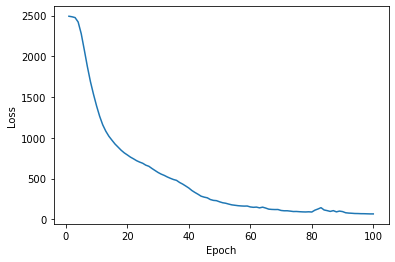

In [ ]:
plt.plot(np.arange(1,max_iter+1,1), cost_arr)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Get test set accuracy

In [ ]:
def predict_y(W, b, X):
    M = X.shape[0]
    y_pred = np.zeros(M)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(feed_forward(X[i,:].T, W, B, act_funcs))
    return y_pred

y_test_predicted = predict_y(W, B, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f' % (test_accuracy))

Test accuracy: 0.9082


## In-class exercise (40 points)

Modify the code above to plot both training loss and test loss as a function of epoch number.
Use early stopping to obtain the best model according to the validation set.
Experiment with the hyperparameters (learning rate, number of layers, number of units per layer) to get
the best result you can.

- Do at least 3 examples
- Plot graphs
- Tell the validation accuracy
- Describe your experiments and results in your lab report.

In [ ]:
# modify your code here

In [ ]:
# 1st example

h2 = 6
h1 = 8
W = [[], np.random.normal(0,0.1,[x_area,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
B = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]

act_funcs = [None, ReLu, Sigmoid, Softmax]

L = len(W)-1

In [ ]:
cost_1 = [] 
test_cost_1 = []

alpha = 0.005
max_iter = 100

target_iter = 1
target_cost = np.inf

new_W = W
new_b = b

for iter in range(0, max_iter):
    loss_this_iter = 0
    # test_loss_this_iter = 0
    test_loss = 0
    
    # random index of m_train
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        # Grab the pattern order[i]
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]
        
        # Feed forward step
        a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        # print(loss_this_pattern)
        loss_this_iter = loss_this_iter + loss_this_pattern
        # print(loss_this_iter)
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)
        
        # update weight, bias
        W, B = update_step(W, B, dW, db, alpha)
        
    y_pred = np.zeros((X_test.shape[0]))
                          
    for k in range(X_test.shape[0]):
        y_pred = feed_forward(X_test[k,:].T, W, B, act_funcs)
        test_loss += loss(y_test[k], y_pred)
        
    test_cost_1.append(test_loss[0,0]) 
    cost_1.append(loss_this_iter[0,0])
        
#     test_loss_this_pattern = loss(y_test, y_pred[L])
#     test_loss_this_iter = test_loss_this_iter + test_loss_this_pattern
#     print(test_loss_this_iter)

    if test_loss < target_cost:
        target_cost = test_loss
        target_iter = iter
        new_W = W.copy()
        new_B = b.copy()
        
    print('Epoch: %d, Train loss: %f and Test loss: %f' % (iter+1, loss_this_iter, test_loss))

print('-------------------------------------------------------')
print('Best cost %f is at iteration %f.'% (target_cost, target_iter+1))

y_test_predicted = predict_y(new_W, new_b, X_test)
y_correct = y_test_predicted == y_test_indices
test_acc_1 = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f' % (test_acc_1))

Epoch: 1, Train loss: 2488.696967 and Test loss: 1657.483406
Epoch: 2, Train loss: 2483.140223 and Test loss: 1656.171130
Epoch: 3, Train loss: 2479.562348 and Test loss: 1653.543085
Epoch: 4, Train loss: 2475.196418 and Test loss: 1650.352375
Epoch: 5, Train loss: 2467.446934 and Test loss: 1643.479475
Epoch: 6, Train loss: 2451.634903 and Test loss: 1628.554426
Epoch: 7, Train loss: 2418.559008 and Test loss: 1598.734590
Epoch: 8, Train loss: 2347.420177 and Test loss: 1538.621805
Epoch: 9, Train loss: 2224.280853 and Test loss: 1450.411384
Epoch: 10, Train loss: 2069.253382 and Test loss: 1350.002364
Epoch: 11, Train loss: 1914.676211 and Test loss: 1259.379028
Epoch: 12, Train loss: 1775.337620 and Test loss: 1173.259622
Epoch: 13, Train loss: 1646.514714 and Test loss: 1092.777969
Epoch: 14, Train loss: 1525.549107 and Test loss: 1014.259261
Epoch: 15, Train loss: 1413.422470 and Test loss: 942.036894
Epoch: 16, Train loss: 1314.506956 and Test loss: 883.907246
Epoch: 17, Train lo

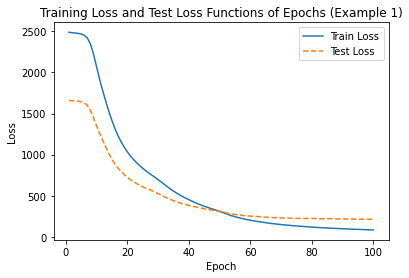

In [ ]:
plt.plot(np.arange(1, max_iter + 1, 1), cost_1, label='Train Loss')
plt.plot(np.arange(1, max_iter + 1, 1), test_cost_1,'--', label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training Loss and Test Loss Functions of Epochs (Example 1)')
plt.legend()
plt.show()

In [ ]:
# 2nd example

h2 = 3
h1 = 6
W = [[], np.random.normal(0,0.1,[x_area,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
B = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]

act_funcs = [None, ReLu, Sigmoid, Softmax]

L = len(W)-1

In [ ]:
cost_2 = [] 
test_cost_2 = []

alpha = 0.004
max_iter = 100

target_iter = 1
target_cost = np.inf

new_W = W
new_b = b

for iter in range(0, max_iter):
    loss_this_iter = 0
    # test_loss_this_iter = 0
    test_loss = 0
    
    # random index of m_train
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        # Grab the pattern order[i]
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]
        
        # Feed forward step
        a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        # print(loss_this_pattern)
        loss_this_iter = loss_this_iter + loss_this_pattern
        # print(loss_this_iter)
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)
        
        # update weight, bias
        W, B = update_step(W, B, dW, db, alpha)
        
    y_pred = np.zeros((X_test.shape[0]))
                          
    for k in range(X_test.shape[0]):
        y_pred = feed_forward(X_test[k,:].T, W, B, act_funcs)
        test_loss += loss(y_test[k], y_pred)
        
    test_cost_2.append(test_loss[0,0]) 
    cost_2.append(loss_this_iter[0,0])
        
#     test_loss_this_pattern = loss(y_test, y_pred[L])
#     test_loss_this_iter = test_loss_this_iter + test_loss_this_pattern
#     print(test_loss_this_iter)

    if test_loss < target_cost:
        target_cost = test_loss
        target_iter = iter
        new_W = W.copy()
        new_B = b.copy()
        
    print('Epoch: %d, Train loss: %f and Test loss: %f' % (iter+1, loss_this_iter, test_loss))

print('-------------------------------------------------------')
print('Best cost %f is at iteration %f.'% (target_cost, target_iter+1))

y_test_predicted = predict_y(new_W, new_b, X_test)
y_correct = y_test_predicted == y_test_indices
test_acc_2 = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f' % (test_acc_2))

Epoch: 1, Train loss: 2487.169716 and Test loss: 1658.470154
Epoch: 2, Train loss: 2483.738021 and Test loss: 1657.440977
Epoch: 3, Train loss: 2482.591305 and Test loss: 1657.250149
Epoch: 4, Train loss: 2481.494609 and Test loss: 1656.338732
Epoch: 5, Train loss: 2480.385788 and Test loss: 1655.308213
Epoch: 6, Train loss: 2478.358598 and Test loss: 1653.692156
Epoch: 7, Train loss: 2475.493614 and Test loss: 1651.240806
Epoch: 8, Train loss: 2470.524290 and Test loss: 1647.156399
Epoch: 9, Train loss: 2460.997194 and Test loss: 1638.288848
Epoch: 10, Train loss: 2442.251118 and Test loss: 1620.849541
Epoch: 11, Train loss: 2404.502634 and Test loss: 1587.675564
Epoch: 12, Train loss: 2341.803880 and Test loss: 1539.282581
Epoch: 13, Train loss: 2266.165364 and Test loss: 1488.788452
Epoch: 14, Train loss: 2191.328779 and Test loss: 1440.388426
Epoch: 15, Train loss: 2117.910022 and Test loss: 1391.981340
Epoch: 16, Train loss: 2044.358162 and Test loss: 1345.498330
Epoch: 17, Train 

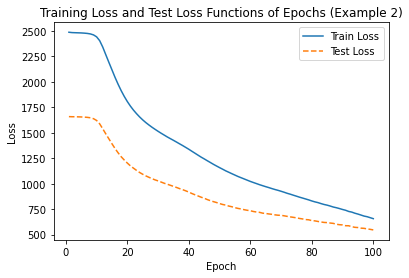

In [ ]:
plt.plot(np.arange(1, max_iter + 1, 1), cost_2, label='Train Loss')
plt.plot(np.arange(1, max_iter + 1, 1), test_cost_2,'--', label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training Loss and Test Loss Functions of Epochs (Example 2)')
plt.legend()
plt.show()

In [ ]:
# 3rd example

h2 = 6
h1 = 9
W = [[], np.random.normal(0,0.1,[x_area,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
B = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]

act_funcs = [None, ReLu, Sigmoid, Softmax]

L = len(W)-1

In [ ]:
cost_3 = [] 
test_cost_3 = []

alpha = 0.003
max_iter = 100

target_iter = 1
target_cost = np.inf

new_W = W
new_b = b

for iter in range(0, max_iter):
    loss_this_iter = 0
    # test_loss_this_iter = 0
    test_loss = 0
    
    # random index of m_train
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        # Grab the pattern order[i]
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]
        
        # Feed forward step
        a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        # print(loss_this_pattern)
        loss_this_iter = loss_this_iter + loss_this_pattern
        # print(loss_this_iter)
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)
        
        # update weight, bias
        W, B = update_step(W, B, dW, db, alpha)
        
    y_pred = np.zeros((X_test.shape[0]))
                          
    for k in range(X_test.shape[0]):
        y_pred = feed_forward(X_test[k,:].T, W, B, act_funcs)
        test_loss += loss(y_test[k], y_pred)
        
    test_cost_3.append(test_loss[0,0]) 
    cost_3.append(loss_this_iter[0,0])
        
#     test_loss_this_pattern = loss(y_test, y_pred[L])
#     test_loss_this_iter = test_loss_this_iter + test_loss_this_pattern
#     print(test_loss_this_iter)

    if test_loss < target_cost:
        target_cost = test_loss
        target_iter = iter
        new_W = W.copy()
        new_B = b.copy()
        
    print('Epoch: %d, Train loss: %f and Test loss: %f' % (iter+1, loss_this_iter, test_loss))

print('-------------------------------------------------------')
print('Best cost %f is at iteration %f.'% (target_cost, target_iter+1))

y_test_predicted = predict_y(new_W, new_b, X_test)
y_correct = y_test_predicted == y_test_indices
test_acc_3 = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f' % (test_acc_3))

Epoch: 1, Train loss: 2495.232814 and Test loss: 1661.006066
Epoch: 2, Train loss: 2484.541821 and Test loss: 1656.925834
Epoch: 3, Train loss: 2481.055249 and Test loss: 1654.405156
Epoch: 4, Train loss: 2478.691483 and Test loss: 1653.571866
Epoch: 5, Train loss: 2476.254782 and Test loss: 1651.995016
Epoch: 6, Train loss: 2472.601640 and Test loss: 1649.402879
Epoch: 7, Train loss: 2467.954053 and Test loss: 1645.122611
Epoch: 8, Train loss: 2460.472975 and Test loss: 1639.049897
Epoch: 9, Train loss: 2449.489915 and Test loss: 1630.248517
Epoch: 10, Train loss: 2432.465672 and Test loss: 1617.029389
Epoch: 11, Train loss: 2406.885604 and Test loss: 1596.483323
Epoch: 12, Train loss: 2367.596337 and Test loss: 1566.166458
Epoch: 13, Train loss: 2310.481282 and Test loss: 1522.038240
Epoch: 14, Train loss: 2233.410213 and Test loss: 1465.831140
Epoch: 15, Train loss: 2142.059316 and Test loss: 1404.747356
Epoch: 16, Train loss: 2046.681825 and Test loss: 1341.743171
Epoch: 17, Train 

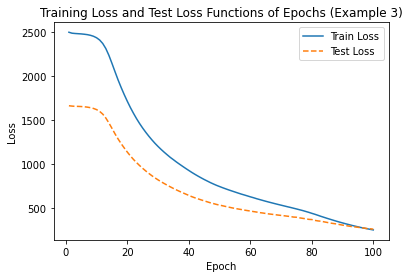

In [ ]:
plt.plot(np.arange(1, max_iter + 1, 1), cost_3, label='Train Loss')
plt.plot(np.arange(1, max_iter + 1, 1), test_cost_3,'--', label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training Loss and Test Loss Functions of Epochs (Example 3)')
plt.legend()
plt.show()

For the 3 different examples, I used two hidden layers for all of them. 

1. For the 1st example, I used 1st hidden layer with 8 neurons and 2nd hidden layer with 6 neurons, where the learning rate was 0.005. The model obtained 92.07 accuracy on the test set, but we can observe that it started to overfit after 60 epochs from the plot (which is not expected). 

2. For the 2nd example, the 1st hidden layer has 6 neurons, the 2nd hidden layer has 3 neurons and the learning rate was 0.004. From the plot, it can be said that the model could not fit the data properly. The reasons can be that model is not deep enough to learn the patterns or the model can be very slow due to a small learning rate.

3. For the last example, the neural network has 1st hidden layer with 9 neurons and 2nd hidden layer with 6 neurons, where the learning rate was 0.003. This model has more neurons than the previous ones but also has the lowest learning rate comparing the previous two model. It obtained 92.35% accuracy, where it converges better than the 2nd model and also there is no overfitting observed from the plot unlike the 1st model. So, this model is the best among the 3 examples.

## PyTorch tutorial

Is there an easier way to build this type of model? One way is to learn a framework such as TensorFlow or PyTorch. Both of these frameworks have their
pros and cons, but PyTorch is probably the most productive neural network framework for research purposes. We'll use it here.

The material for this tutorial is from
[Anand Saha's PyTorch tutorial](https://github.com/anandsaha/deep.learning.with.pytorch).

### Tensors and Tensor operations

Let's get some hands on experience with tensor creation and operations.
The torch package contains the necessary data structures to create multidimensional tensors.
It also defines the mathematical operations that can be performed on these.

In [1]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch

In [3]:
print(torch.__version__)

1.12.1+cu113


### Tensor creation

Create a (2x3) dimentional Tensor.

Note that a) You get back a FloatTensor b) The values are uninitialized

In [4]:
t = torch.Tensor(2, 3)
print(t)

tensor([[2.4671e-35, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 0.0000e+00]])


The above call was equivalent to

In [5]:
t = torch.FloatTensor(2, 3)
print(t)

tensor([[2.4672e-35, 0.0000e+00, 5.0447e-44],
        [0.0000e+00,        nan, 0.0000e+00]])


Inspect type of an element

In [9]:
t[0][0]

tensor(2.4672e-35)

In [10]:
type(t[0][0])

torch.Tensor

Inspect `t`'s dimensions

In [11]:
print(t.size())
print(t.dim())
print(len(t.size()) == t.dim())

torch.Size([2, 3])
2
True


Set values

In [12]:
t[0][0] = 1
t[0][1] = 2
t[0][2] = 3
t[1][0] = 4
t[1][1] = 5
t[1][2] = 6
print(t)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


Let's cast a FloatTensor to IntTensor

In [13]:
t = torch.FloatTensor([1.1, 2.2])
print(t)
t.type(torch.IntTensor)

tensor([1.1000, 2.2000])


tensor([1, 2], dtype=torch.int32)

Let's explore some other ways of creating a tensor

In [14]:
# From another Tensor

t2 = torch.Tensor(t)
print(t2)

tensor([1.1000, 2.2000])


In [15]:
# From a Python list

t3 = torch.IntTensor([[1, 2],[3, 4]])
print(t3)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [16]:
# From a NumPy array

import numpy as np
a = np.array([55, 66])
t4 = torch.Tensor(a)
print(t4)

tensor([55., 66.])


In [17]:
# Create a Tensor with all zeros

t5 = torch.zeros(2, 3)
print(t5)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [18]:
# Create a Tensor with all ones

t6 = torch.ones(2, 3)
print(t6)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [19]:
# Create a Tensor with all ones with dimensions 
# of another Tensor

t7 = torch.ones_like(t4)
print(t7)

tensor([1., 1.])


### Tensor operations

Add two Tensors

In [20]:
t1 = torch.ones(2, 2)
t2 = torch.ones(2, 2)
t = t1 + t2
print(t)

tensor([[2., 2.],
        [2., 2.]])


Inplace/out-of-place operations

In [21]:
t1.add(t2)

tensor([[2., 2.],
        [2., 2.]])

In [22]:
print(t1)

tensor([[1., 1.],
        [1., 1.]])


In [23]:
t1.add_(t2)

tensor([[2., 2.],
        [2., 2.]])

In [24]:
print(t1)

tensor([[2., 2.],
        [2., 2.]])


Class methods and package functions

In [25]:
t1.cos()

tensor([[-0.4161, -0.4161],
        [-0.4161, -0.4161]])

In [26]:
torch.cos(t1)

tensor([[-0.4161, -0.4161],
        [-0.4161, -0.4161]])

A few more operations

In [27]:
# Create a one-dimensional tensor of steps equally 
# spaced points between start and end

torch.linspace(3, 10, steps=5)

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])

In [28]:
# Create a 1-D Tensor with values from [start, end)

torch.arange(0, 5)

tensor([0, 1, 2, 3, 4])

In [29]:
# Create a (2x3) Tensor with random values sampled 
# from uniform distrubution on the interval [0,1)

torch.rand((2,3))

tensor([[0.5247, 0.7715, 0.8032],
        [0.0809, 0.5398, 0.4100]])

In [30]:
# Create a (2x3) Tensor with random values sampled 
# from normal distrubution with 0 mean and variance 1

torch.randn((2,3))

tensor([[-0.1666, -0.6172, -1.0396],
        [ 0.3983,  0.3975,  0.3197]])

In [31]:
# Do a matrix multiply

a = torch.rand((2, 3))
b = torch.rand((3, 2))

torch.mm(a, b)

tensor([[0.8210, 0.8017],
        [0.5490, 0.4622]])

### Variables

Next, let's understand variables in PyTorch and the operations we can perform on them.

In [32]:
import torch
from torch.autograd import Variable

Let's create a small computation graph

In [33]:
x = Variable(torch.FloatTensor([11.2]), requires_grad=True)
y = 2 * x

In [34]:
print(x)
print(y)

tensor([11.2000], requires_grad=True)
tensor([22.4000], grad_fn=<MulBackward0>)


In [35]:
print(x.data)
print(y.data)

tensor([11.2000])
tensor([22.4000])


In [36]:
print(x.grad_fn)
print(y.grad_fn)

None


In [37]:
y.backward() # Calculates the gradients

In [38]:
print(x.grad)
print(y.grad)

tensor([2.])
None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


### Working with PyTorch and NumPy

In [1]:
import torch
import numpy as np

Convert a NumPy array to Tensor

In [2]:
n = np.array([2, 3])
t = torch.from_numpy(n)
print(n)
print(t)

[2 3]
tensor([2, 3])


Change a Tensor value, and see the change in 
corresponding NumPy array

In [3]:
n[0] = 100
print(t)

tensor([100,   3])


Convert a Tensor to NumPy array

In [4]:
t = torch.FloatTensor([5, 6])
n = t.numpy()
print(t)
print(n)

tensor([5., 6.])
[5. 6.]


Change a Tensor value, and see the change in corresponding NumPy array

In [5]:
t[0] = 100
print(n)

[100.   6.]


### Tensors on GPU

Check if your machine has GPU support

In [6]:
if torch.cuda.is_available():
    print("GPU Supported")
else:
    print("GPU Not Supported")

GPU Supported


Check the number of GPUs attached to this machine

In [7]:
torch.cuda.device_count()

1

Get device name

In [8]:
torch.cuda.get_device_name(0)

'Tesla T4'

Moving a Tensor to GPU

In [9]:
t = torch.FloatTensor([2, 3])

In [10]:
print(t)

tensor([2., 3.])


In [11]:
t = t.cuda(0)

Creating a Tensor on GPU, directly

In [12]:
t = torch.cuda.FloatTensor([2, 3])
print(t)

tensor([2., 3.], device='cuda:0')


Bring it back to CPU

In [13]:
t = t.cpu()
print(t)

tensor([2., 3.])


Use device context

In [14]:
with torch.cuda.device(0):
    t = torch.cuda.FloatTensor([2, 3])
    print(t)

tensor([2., 3.], device='cuda:0')



## MNIST digit recognition using PyTorch

This part of the lab was
taken from the [Kaggle tutorial on MNIST with PyTorch]('https://www.kaggle.com/justuser/mnist-with-pytorch-fully-connected-network).

We will use a fully connected neural network and a batch learning algorithm and explain each
step along the way.

So, with that being said, let's start with imports that we will need.
First of all, we need to import PyTorch. There are some common names for torch modules (like numpy is always named np):  torch.nn.functional is imported as F,  torch.nn is the core module, and is simply imported as nn.
Also, we need numpy. We also use pyplot and seaborn for visualization, but they are not required for the network itself. 
And finally, we use pandas for importing and transforming data.


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Now we can import and transform the data. I decided to split it into input and labels right away at this step:

In [2]:
print("Reading the data...")
data = pd.read_csv('train_mnist.csv', sep=",")
test_data = pd.read_csv('test_mnist.csv', sep=",")

print("Reshaping the data...")
dataFinal = data.drop('label', axis=1)
labels = data['label']


dataNp = dataFinal.to_numpy()
labelsNp = labels.to_numpy()
test_dataNp = test_data.to_numpy()

print("Data is ready")

Reading the data...
Reshaping the data...
Data is ready


Now that data is ready, we can take a look at what we're dealing with. I will be using heatmaps from seaborn, which is an excellent tool for matrix visualization. But first, since the images in the MNIST dataset are represented as a long 1d arrays of pixels, we will need to reshape it into 2d array. That's where .reshape() from numpy comes in handy. The pictures are 28 x 28 pixels, so these will be the parameters.

Let's select a couple random samples and visualize them. I will also print their labels, so we can compare images with their actual value:

8  /  9
8  /  4
9  /  1


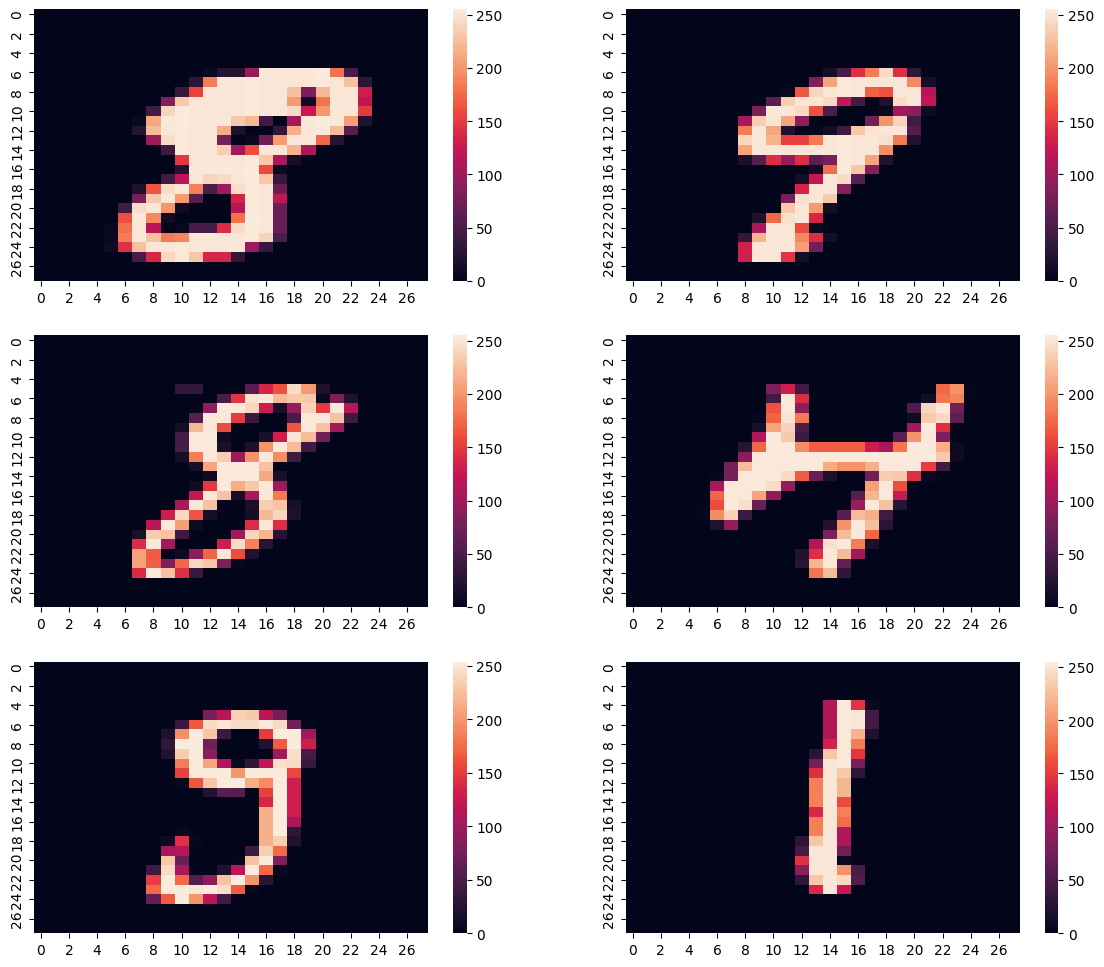

In [3]:
plt.figure(figsize=(14, 12))

pixels = dataNp[10].reshape(28, 28)
plt.subplot(321)
sns.heatmap(data=pixels)

pixels = dataNp[11].reshape(28, 28)
plt.subplot(322)
sns.heatmap(data=pixels)

pixels = dataNp[20].reshape(28, 28)
plt.subplot(323)
sns.heatmap(data=pixels)

pixels = dataNp[32].reshape(28, 28)
plt.subplot(324)
sns.heatmap(data=pixels)

pixels = dataNp[40].reshape(28, 28)
plt.subplot(325)
sns.heatmap(data=pixels)

pixels = dataNp[52].reshape(28, 28)
plt.subplot(326)
sns.heatmap(data=pixels)

print(labels[10], " / ", labels[11])
print(labels[20], " / ", labels[32])
print(labels[40], " / ", labels[52])

PyTorch has it's own way to store data - those are called tensors, and they are just like numpy arrays, but are suited for PyTorch needs. If we want to feed the data to the network, we need to transform the dataset into those tensors. The good news is that PyTorch can easily do that by transforming numpy arrays or regular lists into tensors.

In [4]:
x = torch.FloatTensor(dataNp.tolist())
y = torch.LongTensor(labelsNp.tolist())

Before we start writing the actual network, we need to determine what will be the hyperparameters. Those will not be adjusted during training, so we need to be careful how we set them up. 

Here's what we will specify:
* **input_size** - size of the input layer, it is always fixed (784 pixels)
* **output_size** - size of the output layer, also fixed size (10 for every possible digit)
* **hidden_size** - size of the hidden layer, this parameter determines structure of the network. 200 worked for me, but it is worth to play with this parameter to see what works for you
* **epochs** - how many times will the network go through the entire dataset during training. 
* **learning_rate** - determines how fast will the network learn. You should be very careful about this parameter, because if it is too high, the network won't learn at all, if it is too low, the net will learn too long. I's always about balance. Usualy 10^-3 - 10^-5 works just fine.
* **batch_size** - size of mini batches during training

In [5]:
# hyperparameters
input_size = 784
output_size = 10
hidden_size = 200

epochs = 20
batch_size = 50
learning_rate = 0.00005

Now we can finally write the actual network. To make it all work, the Network class needs to inherit the *nn.Module*, which gives it the basic functionality required, and allows PyTorch to work with it as expected. 

When writing a PyTorch neural network, some things must always be there:
* \__init\__(self) - initializes the net and creates an instance of that *nn.Module*. Here we define the structure of the network.
* forward(self, x) - defines forward propagation and how the data flow through the network. Of course, it is based on the structure that is defined in the previous function.

In the initialization, first of all, we need to initialize super (or base) module that the net inherits. After that first line, is the definition of structure. You can experiment with (put more layers or change hidden layer size, etc.), but this structure worked for me just fine.

In forward propagation we simply reassign the value of x as it flows through the layers and return the [softmax](https://en.wikipedia.org/wiki/Softmax_function) at the end.

In [6]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l3(x)
        return F.log_softmax(x)

After we've defined the network, we can initialize it. 
Also, if we "print" the instance of the net, we can see the structure of it in a neat format:

In [7]:
net = Network()
print(net)

Network(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (relu): ReLU()
  (l3): Linear(in_features=200, out_features=10, bias=True)
)


Now it's time to set up the [optimizer](http://pytorch.org/docs/master/optim.html) and a loss function. 

*There are quite a lot of things happening behind these two lines of code, so if you don't know what is going on here, don't worry too much for now, it will get clearer eventualy.* 

Optimizer is what  updates the parameters of the network. I will be using Stochastic Gradient Descent with momentum. Also, the optimizer takes the network parameters as an argument, but it's not a big deal since we can get those with .parameters() function.

I decided to use [Cross Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy) for this problem, but again, there are many options and you are free to choose whatever suits you best.

In [8]:
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

Now that everything is ready, our network can start learning. I will separate data into minibatches and feed it to the network. It has many advantages over single batch learning, but that is a different story. 

Also, I will use loss_log list to keep track of the loss function during the training process. 

In [9]:
loss_log = []

for e in range(epochs):
    for i in range(0, x.shape[0], batch_size):
        x_mini = x[i:i + batch_size] 
        y_mini = y[i:i + batch_size] 
        
        x_var = Variable(x_mini)
        y_var = Variable(y_mini)
        
        optimizer.zero_grad()
        net_out = net(x_var)
        
        loss = loss_func(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            loss_log.append(loss.item())
        
    print('Epoch: {} - Loss: {:.6f}'.format(e, loss.item()))

Epoch: 0 - Loss: 0.054447
Epoch: 1 - Loss: 0.008302
Epoch: 2 - Loss: 0.004393
Epoch: 3 - Loss: 0.002782
Epoch: 4 - Loss: 0.001979
Epoch: 5 - Loss: 0.001623
Epoch: 6 - Loss: 0.001603
Epoch: 7 - Loss: 0.001388
Epoch: 8 - Loss: 0.001147
Epoch: 9 - Loss: 0.001017
Epoch: 10 - Loss: 0.000921
Epoch: 11 - Loss: 0.000807
Epoch: 12 - Loss: 0.000724
Epoch: 13 - Loss: 0.000608
Epoch: 14 - Loss: 0.000523
Epoch: 15 - Loss: 0.000530
Epoch: 16 - Loss: 0.000443
Epoch: 17 - Loss: 0.000437
Epoch: 18 - Loss: 0.000403
Epoch: 19 - Loss: 0.000375


So, let's go line by line and see what is happening here:

This is the main loop that goes through all the epochs of training. An epoch is one full training on the full dataset.

    for e in range(epochs):
This is the inner loop that simply goes through the dataset batch by batch:

    for i in range(0, x.shape[0], batch_size):
Here is where we get the batches out of our data and simply assign them to variables for further work:

    x_mini = x[i:i + batch_size] 
    y_mini = y[i:i + batch_size] 
   These two lines are quite *important*. Remember I told you about tensors and how PyTorch stores data in them? That's not the end of story. Actually, to allow the network to work with data, we need a wrapper for those tensors called Variable. It has some additional properties, like allowing automatic gradient computation when backpropagating. It is required for the proper work of PyTorch, so we will add them here and supply tensors as parameters:
   
    x_var = Variable(x_mini)
    y_var = Variable(y_mini)
This line just resets the gradient of the optimizer:
    
    optimizer.zero_grad()
Remember the *forward(self, x)* function that we previously defined? The next line is basically calling this function and does the forward propagation:

    net_out = net(x_var)
This line computes the loss function based on predictions of the net and the correct answers:

    loss = loss_func(net_out, y_var)
Here we compute the gradient based on the loss that we've got. It will be used to adjust parameters of the network.

    loss.backward()
And here is where we finally update our network with new adjusted parameters:

    optimizer.step()
The rest is just logging, which might be helpful to observe how well the network is performing.

After the network is done with training, we can take a look at the loss function, and how it behaved during training:

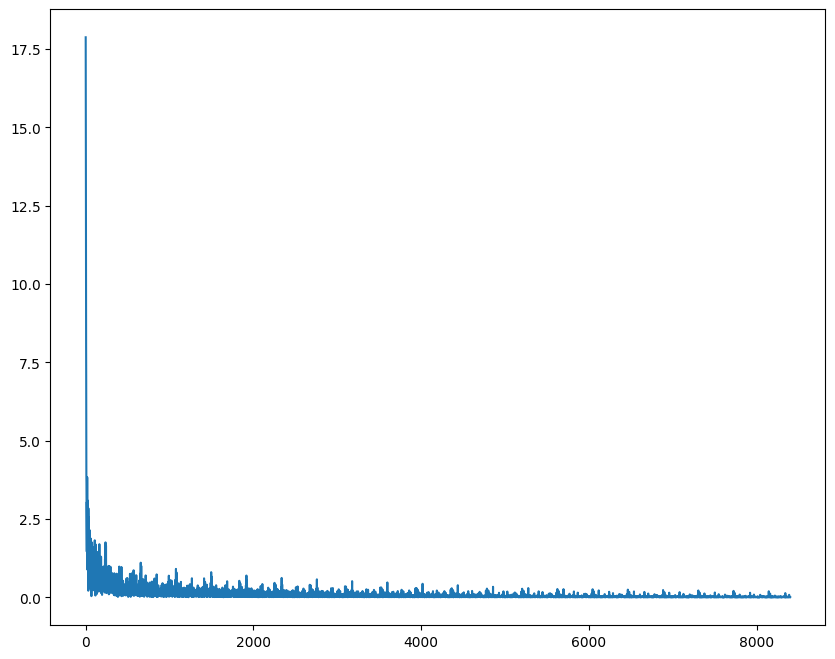

In [10]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)

At this point, the network should be trained, and we can make a prediction using the test dataset. All we need to do is wrap the data into the Variable and feed it to the trained net, so nothing new here.

In [11]:
test = torch.FloatTensor(test_dataNp.tolist())
test_var = Variable(test)

net_out = net(test_var)

print(torch.max(net_out.data, 1)[1].numpy())

[2 0 9 ... 3 9 2]


Now we have out predictions that are ready to be submitted. Before that, we can take a look at predictions and compare them to the actual pictures of digits, just like at the start with training data:

Prediction: 0 / 5
Prediction: 9 / 7
Prediction: 0 / 8


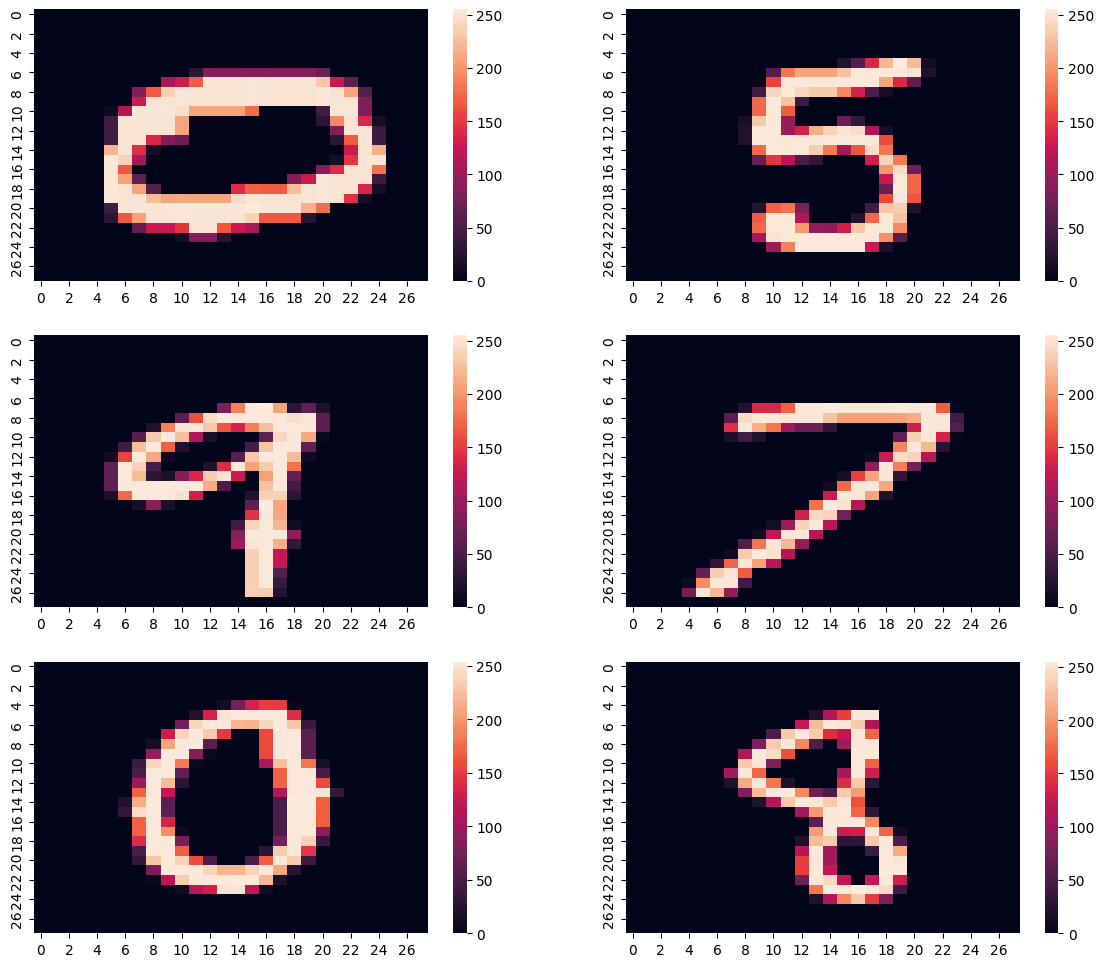

In [12]:
plt.figure(figsize=(14, 12))

pixels = test_dataNp[1].reshape(28, 28)
plt.subplot(321)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[1].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[10].reshape(28, 28)
plt.subplot(322)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[10].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[20].reshape(28, 28)
plt.subplot(323)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[20].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[30].reshape(28, 28)
plt.subplot(324)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[30].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[100].reshape(28, 28)
plt.subplot(325)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[100].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[2000].reshape(28, 28)
plt.subplot(326)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[1].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)


print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[1], torch.max(net_out.data, 1)[1].numpy()[10]))
print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[20], torch.max(net_out.data, 1)[1].numpy()[30]))
print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[100], torch.max(net_out.data, 1)[1].numpy()[2000]))

In [13]:
output = (torch.max(net_out.data, 1)[1]).numpy()
#np.savetxt("out.csv", np.dstack((np.arange(1, output.size+1),output))[0],"%d,%d",header="ImageId,Label")

And that is about it, we've made a simple neural network using PyTorch that can recognize handwritten digits. Not so bad!

When I was writing this notebook, this model scorred 96.6%, which is not perfect by any means, but it's not that bad either. 

I hope this was useful for some of you. If you are totally new to deep learning, I suggest you learn how the neural networks actually work from the inside, especially the backpropagation algorithm.

These videos explain [neural nets](https://www.youtube.com/watch?v=aircAruvnKk&t=708s) and [backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U) quite well.

Also I suggest you to take a look at this [online book](http://neuralnetworksanddeeplearning.com/chap1.html) (it's absolutely free, btw), where neural networks are explained in great detail, and it even has an implementation of the MNIST problem from scratch, using only numpy.

If you have any feedback, feel free to leave comments down below, and good luck with your deep learning adventures :)

## Take-home exercise (50 points)

Make sure you can run the PyTorch examples of MNIST classification, then apply the PyTorch example to another
classification problem you've worked with this semester, for example the breast cancer dataset. Get familiar with
working with models in PyTorch.

Report your experiments and results in your brief lab report.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("breast_cancer.csv")
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [17]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
X = data.drop(columns=['id','Unnamed: 32','diagnosis'])
y = data['diagnosis']
y, unique_y = pd.factorize(y)
X_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train)
y_test_tensor = torch.FloatTensor(y_test)

# y_train_tensor = torch.LongTensor(y_train)
# y_test_tensor = torch.LongTensor(y_test)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [30]:
# Your code here

input_size = 30
output_size = 1
hidden1_size = 16
hidden2_size = 8
#hidden3_size = None
#hidden4_size = None

epochs = 100
batch_size = 64
learning_rate = 0.001

In [31]:
class Network(nn.Module):
    
    def __init__(self):
        
        super(Network, self).__init__()
        ### BEGIN SOLUTION
                
        self.l1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        
        self.l2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        
        self.l3 = nn.Linear(hidden2_size, output_size)
        
        ### END SOLUTION
        
    def forward(self, x):
        
        ### BEGIN SOLUTION
        
        x = self.l1(x)
        x = self.relu1(x)
        
        x = self.l2(x)
        x = self.relu2(x)
        
        x = self.l3(x)
        return F.sigmoid(x)
    
        ### END SOLUTION

In [32]:
# Continue yourself

model = Network()
print(model)

Network(
  (l1): Linear(in_features=30, out_features=16, bias=True)
  (relu1): ReLU()
  (l2): Linear(in_features=16, out_features=8, bias=True)
  (relu2): ReLU()
  (l3): Linear(in_features=8, out_features=1, bias=True)
)


In [33]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
J_func = nn.BCELoss()

In [34]:
train_loss_arr = []
test_loss_arr = []

for e in range(epochs):
    
    for i in range(0, X_train_tensor.shape[0], batch_size):
        
        x_mini = X_train_tensor[i:i + batch_size] 
        y_mini = y_train_tensor[i:i + batch_size] 
        
        x_var = Variable(x_mini)
        y_var = Variable(y_mini)
        
        y_var = y_var.reshape(-1, 1)
        
        x_test_var = Variable(X_test_tensor)
        y_test_var = Variable(y_test_tensor)
        
        y_test_var = y_test_var.reshape(-1, 1)
        
        optimizer.zero_grad()
        out = model(x_var)
        
        loss = J_func(out, y_var)
        loss.backward()
        optimizer.step() 
        
        test_out = model(x_test_var)
        test_loss = J_func(test_out, y_test_var)
        
        if i % 100 == 0:
            train_loss_arr.append(loss.item())
            test_loss_arr.append(test_loss.item())                 
                              
        
    print('Epoch: {}, Training Loss: {:.3f}, Test loss: {:.3f}'.format(e+1, loss.item(),test_loss.item()))

Epoch: 1, Training Loss: 0.739, Test loss: 0.727
Epoch: 2, Training Loss: 0.733, Test loss: 0.722
Epoch: 3, Training Loss: 0.725, Test loss: 0.715
Epoch: 4, Training Loss: 0.716, Test loss: 0.709
Epoch: 5, Training Loss: 0.708, Test loss: 0.702
Epoch: 6, Training Loss: 0.699, Test loss: 0.695
Epoch: 7, Training Loss: 0.691, Test loss: 0.689
Epoch: 8, Training Loss: 0.682, Test loss: 0.682
Epoch: 9, Training Loss: 0.674, Test loss: 0.676
Epoch: 10, Training Loss: 0.666, Test loss: 0.669
Epoch: 11, Training Loss: 0.658, Test loss: 0.663
Epoch: 12, Training Loss: 0.650, Test loss: 0.656
Epoch: 13, Training Loss: 0.641, Test loss: 0.649
Epoch: 14, Training Loss: 0.633, Test loss: 0.643
Epoch: 15, Training Loss: 0.624, Test loss: 0.636
Epoch: 16, Training Loss: 0.616, Test loss: 0.629
Epoch: 17, Training Loss: 0.607, Test loss: 0.622
Epoch: 18, Training Loss: 0.598, Test loss: 0.614
Epoch: 19, Training Loss: 0.589, Test loss: 0.607
Epoch: 20, Training Loss: 0.579, Test loss: 0.599
Epoch: 21

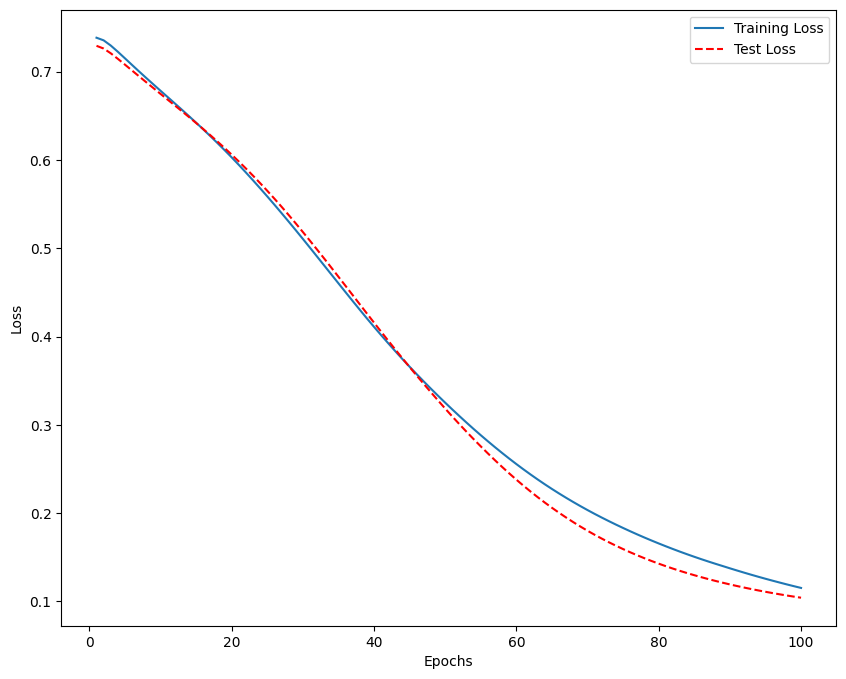

In [36]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1, epochs + 1, 1), train_loss_arr, label='Training Loss')
plt.plot(np.arange(1, epochs + 1, 1), test_loss_arr,'r--', label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [37]:
y_pred = model(X_test_tensor)
y_pred = torch.round(y_pred)
acc = y_test[y_pred.flatten() == y_test_tensor].shape[0]/ len(y_test) * 100

print ('The test set accuracy is ', acc)

The test set accuracy is  98.24561403508771


## Report

In-lab exercise, we used the MNIST dataset and performed hand-coded fully connected neural network, where we obtained the test accuracy 90.82%. Then I did 3 different examples changing the hyperparameters (with different number of neurons in the hidden layers and different learning rate). After that, we built a fully connected neural network with batch learning algorithm using Pytorch on the MNIST digit recognition dataset. We used 20 epochs with a batch size of 50 during the training and plotted the loss. 

For take-home exercise, I used the breast cancer dataset and solved the classification problem by creating a neural network in Pytorch. The model has input_size = 30, hidden1_size = 16, hidden2_size = 8 and output_size = 1. With a batch size of 64 and a learning rate of 0.001, the model could obtain 98.24% accuracy in 100 epochs. Since we have two classes, we used Binary Cross Entropy (BCE) as the loss function and the SGD optimizer to get the output. We can conclude that the model performed well on the dataset since the difference between the training and test loss was small over the epochs and it could obtain a high accuracy on the test set.